<a href="https://colab.research.google.com/github/eduardocarbo/NewRepo/blob/master/Road_incidents_in_the_city_of_Monterrey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Road incidents in the city of Monterrey:
Today, we will develop a few models to determine the consequences of accidents in this city. In fact, identifying the consequences that produce the incident is the best way to prevent future accidents.

https://datos.monterrey.gob.mx/dataset/incidentes-viales

#[1].-Data cleaninig:
The first step in working eith data is to clean it. This involves identifying and correcting any erros or  inconsisitencies in the data. Once the data is clean, it can be analyzed and used to make informed decisions.

In [ ]:
!pip install pandas

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/PORTAFOLIO DATA SCIENCE/Road incidents in the city of Monterrey/incidentesviales_noviembre22.csv")

In [ ]:
data.head(5)

To see how many rows we have:

In [ ]:
len(data)

Pandas has a funtion to remove empty rows:

In [ ]:
data1 = data.dropna(how = 'any')

Check how many rows we have:

In [ ]:
len(data1)

In this case it is impossible to delete the "na" because qe have several missing data, so the records are left as they were before.

In [ ]:
len(data)

We review the type of data we have in our dataframe:

In [ ]:
data.dtypes

In [ ]:
data['fecha'] = pd.to_datetime(data['fecha'])

In [ ]:
data.dtypes

In [ ]:
data.head(5)

In [ ]:
data['fecha'].apply(lambda x: x.month).value_counts()

We will save our information as a result of the data set

In [ ]:
data.to_csv('/content/drive/MyDrive/PORTAFOLIO DATA SCIENCE/Road incidents in the city of Monterrey/clean_incidentesviales_noviembre22.csv',index=None)

##[2].-Data exploration:


In [ ]:
!pip install matplotlib

In [ ]:
%matplotlib inline
import pandas as pd

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/PORTAFOLIO DATA SCIENCE/Road incidents in the city of Monterrey/clean_incidentesviales_noviembre22.csv")

#Dataset overview

In [ ]:
data.columns

In [ ]:
data['fecha'] = pd.to_datetime(data['fecha'])

In [ ]:
data.dtypes

Then an analysis of the numerical columns is generated

In [ ]:
data.describe()

Set of columns with which we are going to work:

In [ ]:
df = data[['fecha','hora','tipo_accidente','causa','tipo_vialidad','zona','total_lesionados','total_muertos','situacion_climatica','situacion_pavimento']]

In [1151]:
df = df.loc[df['fecha'].dt.year == 2022]

In [1152]:
df.dtypes

fecha                  datetime64[ns]
hora                           object
tipo_accidente                 object
causa                          object
tipo_vialidad                  object
zona                           object
total_lesionados                int64
total_muertos                   int64
situacion_climatica            object
situacion_pavimento            object
dtype: object

#One-dimensional analysis of the variables

In [1153]:
df['tipo_accidente'].value_counts()[0:10]

ALCANCE             8455
LATERAL             7228
CRUCERO             4496
ESTRELLAMIENTO      2098
OTRO                2046
DE REVERSA          1030
ATROPELLO            560
VOLCADURA            277
DE FRENTE            208
CAIDA DE PERSONA      71
Name: tipo_accidente, dtype: int64

In [1154]:
df['causa'].value_counts()[0:10]

OTRO                        9413
NO GUARDO DISTANCIA         8328
INVASION DE CARRIL          5432
NO RESPETO SEÑALAMIENTOS    1667
NO RESPETO SEMAFORO          974
DISTRACCION                  217
EXCESO DE VELOCIDAD          206
ESTADO DE ALCOHOLISMO        182
SENTIDO CONTRARIO             47
GIRO INDEBIDO                 38
Name: causa, dtype: int64

In [1155]:
df['zona'].value_counts()[0:10]

CENTRO    2028
NORTE     1513
SUR       1017
Name: zona, dtype: int64

In [1156]:
df['total_lesionados'].value_counts()[0:10]

0     25523
1       789
2       138
3        34
4         8
5         6
6         4
12        1
7         1
22        1
Name: total_lesionados, dtype: int64

In [1157]:
Total_muertos = df['total_muertos'].value_counts()[0:10]
Total_muertos

0    26450
1       53
2        2
Name: total_muertos, dtype: int64

In [1158]:
df['situacion_climatica'].value_counts()[0:10]

SECO       24791
LLUVIA      1713
NEBLINA        1
Name: situacion_climatica, dtype: int64

In [1159]:
df['situacion_pavimento'].value_counts()[0:10]

NORMAL                  24536
RESBALOSO                1701
DAÑO ESTRUCTURAL          255
PRESENCIA DE OBJETOS       13
Name: situacion_pavimento, dtype: int64

Graphics

<Axes: >

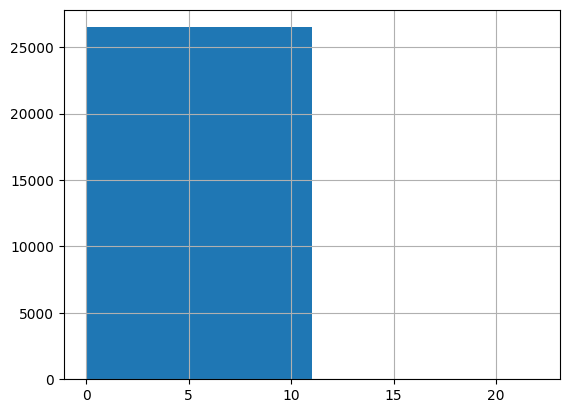

In [1160]:
df['total_lesionados'].hist(bins=2)

<Axes: >

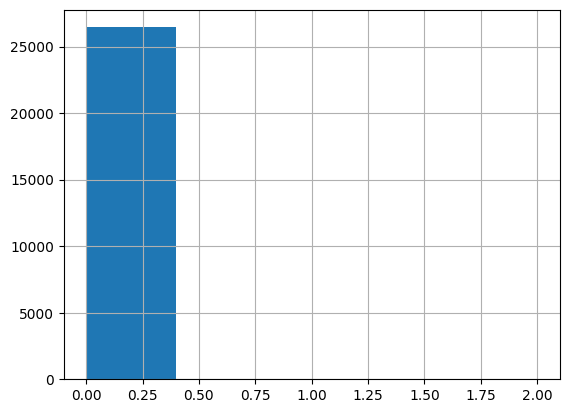

In [1161]:
df['total_muertos'].hist(bins=5)

<Axes: >

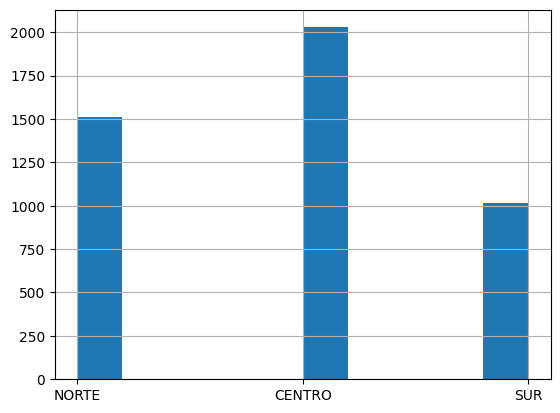

In [1162]:
df['zona'].hist()

#Multidimensional analysis of the variables

In [1169]:
sum_accidente = df.groupby('tipo_accidente').sum(numeric_only=True)['total_muertos']
sum_accidente

tipo_accidente
ALCANCE               2
ATROPELLO            31
CAIDA DE PERSONA      0
CRUCERO               2
DE FRENTE             1
DE REVERSA            2
ESTRELLAMIENTO       12
INCENDIO              0
LATERAL               1
OTRO                  4
SALIDA DEL CAMINO     0
VOLCADURA             2
Name: total_muertos, dtype: int64

In [1178]:
sum_accidente = sum_accidente.reset_index()
sum_accidente

,tipo_accidente,total_muertos
0,ALCANCE,2
1,ATROPELLO,31
2,CAIDA DE PERSONA,0
3,CRUCERO,2
4,DE FRENTE,1
5,DE REVERSA,2
6,ESTRELLAMIENTO,12
7,INCENDIO,0
8,LATERAL,1
9,OTRO,4


In [1180]:
sum_accidente1=sum_accidente.sort_values('total_muertos', ascending=False)
sum_accidente1

,tipo_accidente,total_muertos
1,ATROPELLO,31
6,ESTRELLAMIENTO,12
9,OTRO,4
0,ALCANCE,2
3,CRUCERO,2
5,DE REVERSA,2
11,VOLCADURA,2
4,DE FRENTE,1
8,LATERAL,1
2,CAIDA DE PERSONA,0


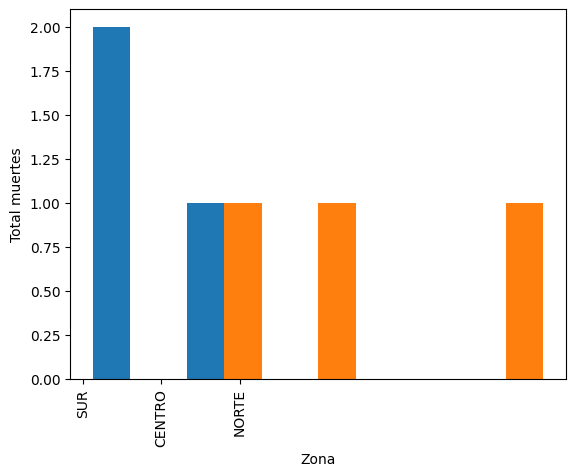

In [1166]:
import matplotlib.pyplot as plt
plt.hist(sum_accidente1, bins =5)
plt.xlabel('Total_accidente')
plt.ylabel('Total muertes')
plt.xticks(rotation=90)
plt.show()

In [1173]:
sum_fecha = df.groupby('fecha').sum()['total_muertos']

<ipython-input-1173-d7ecb8ecfdf1>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum_fecha = df.groupby('fecha').sum()['total_muertos']


In [1182]:
sum_fecha = sum_fecha.reset_index()
sum_fecha

,fecha,total_muertos
0,2022-01-01,0
1,2022-01-02,1
2,2022-01-03,0
3,2022-01-04,0
4,2022-01-05,0
...,...,...
329,2022-12-07,1
330,2022-12-08,0
331,2022-12-09,0
332,2022-12-10,0


In [1184]:
sum_fecha1=sum_fecha.sort_values('total_muertos', ascending=False)
sum_fecha1.head(20)

,fecha,total_muertos
227,2022-08-24,2
94,2022-04-08,2
72,2022-03-17,2
219,2022-08-16,1
70,2022-03-15,1
125,2022-05-10,1
126,2022-05-11,1
67,2022-03-11,1
225,2022-08-22,1
277,2022-10-15,1


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_4, *['total_muertos'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_5, *['total_muertos'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_6, *['fecha', 'total_muertos', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_7, *['fecha', 'count()', None], **{})
chart

#Text analysis

In [1189]:
 !pip install nltk

In [1192]:
import nltk
from nltk.corpus import stopwords

In [1194]:
#print(stopwords.words('spanish'))

In [1197]:
textos_tipo_accidente = ''
for row in df['tipo_accidente']:
  textos_tipo_accidente = textos_tipo_accidente + ' ' + row

In [1199]:
!pip install wordcloud

In [1204]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

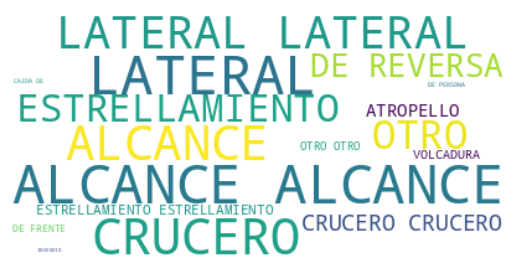

In [1205]:
WC = WordCloud(background_color = 'white')
WC.generate(textos_tipo_accidente)

plt.axis("off")
plt.imshow(WC, interpolation='bilinear')
plt.show()